In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_dir="Object Detection(Ass6)/caltech-101-img"
dataset_datagen= ImageDataGenerator(
    rescale = 1.0/255,
)
batch_size=2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [3]:
x_train,y_train = dataset_generator[0]
x_test,y_test = dataset_generator[1]

In [4]:
print(len(x_train))
print(len(x_test))

2000
2000


In [17]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
weights_path="Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [9]:
for layer in base_model.layers:
    layer.trainable=False

In [18]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
32/32 [==============================] - 8s 233ms/step - loss: 3.9884 - accuracy: 0.1895
Epoch 2/10
32/32 [==============================] - 8s 242ms/step - loss: 3.0189 - accuracy: 0.3730
Epoch 3/10
32/32 [==============================] - 8s 244ms/step - loss: 2.5049 - accuracy: 0.4630
Epoch 4/10
32/32 [==============================] - 8s 254ms/step - loss: 2.0952 - accuracy: 0.5390
Epoch 5/10
32/32 [==============================] - 8s 258ms/step - loss: 1.7866 - accuracy: 0.6125
Epoch 6/10
32/32 [==============================] - 8s 253ms/step - loss: 1.5357 - accuracy: 0.6650
Epoch 7/10
32/32 [==============================] - 8s 255ms/step - loss: 1.3302 - accuracy: 0.7070
Epoch 8/10
32/32 [==============================] - 8s 256ms/step - loss: 1.1614 - accuracy: 0.7575
Epoch 9/10
32/32 [==============================] - 8s 253ms/step - loss: 1.0240 - accuracy: 0.7880
Epoch 10/10
32/32 [==============================] - 8s 255ms/step - loss: 0.9150 - accuracy: 0.8115

In [26]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
32/32 [==============================] - 17s 527ms/step - loss: 3.2204 - accuracy: 0.3365 - val_loss: 2.3892 - val_accuracy: 0.4735
Epoch 2/20
32/32 [==============================] - 17s 545ms/step - loss: 1.9069 - accuracy: 0.5410 - val_loss: 1.9797 - val_accuracy: 0.5280
Epoch 3/20
32/32 [==============================] - 17s 553ms/step - loss: 1.2785 - accuracy: 0.6770 - val_loss: 1.7488 - val_accuracy: 0.5835
Epoch 4/20
32/32 [==============================] - 17s 550ms/step - loss: 0.8018 - accuracy: 0.7855 - val_loss: 1.8201 - val_accuracy: 0.5975
Epoch 5/20
32/32 [==============================] - 17s 548ms/step - loss: 0.4926 - accuracy: 0.8670 - val_loss: 1.7039 - val_accuracy: 0.6155
Epoch 6/20
32/32 [==============================] - 17s 548ms/step - loss: 0.3511 - accuracy: 0.9005 - val_loss: 1.7284 - val_accuracy: 0.6115
Epoch 7/20
32/32 [==============================] - 17s 547ms/step - loss: 0.2359 - accuracy: 0.9360 - val_loss: 1.7130 - val_accuracy: 0.6320

In [27]:
import matplotlib.pyplot as plt
pred = model.predict(x_test)

63/63 [==============================] - 10s 153ms/step


In [28]:
labels = list(dataset_generator.class_indices.keys())

Pred :  Motorbikes
Actual :  dolphin


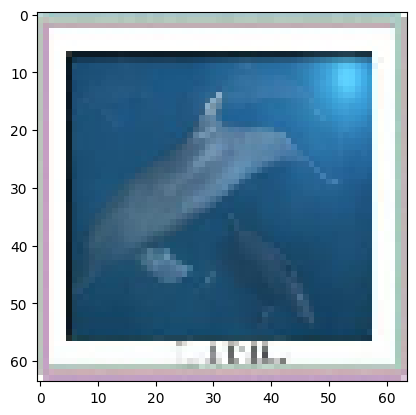

In [33]:
n=0
plt.imshow(x_test[n])
print("Pred : ",labels[np.argmax(pred[n])])
print("Actual : ",labels[np.argmax(y_test[n])])